In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
# Import the style from Matplotlib.
from matplotlib import style
import seaborn as sns

In [3]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
#view df information and datatypes 

alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

---
### Data cleaning and preparation process 


In [5]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [6]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
# Show missing values
print(alzheimer_df.isnull().sum())
print("Overall there are", sum(alzheimer_df.isnull().sum()), "missing values")

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [8]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [9]:
# explore the 'x' columns
#alzheimer_df['x'].describe()

In [10]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [11]:
alzheimer_df.count()

PatientID                    2149
Age                          2149
Gender                       2149
Ethnicity                    2149
EducationLevel               2149
BMI                          2149
Smoking                      2149
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers      2149
CardiovascularDisease        2149
Diabetes                     2149
Depression                   2149
HeadInjury                   2149
Hypertension                 2149
SystolicBP                   2149
DiastolicBP                  2149
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints             2149
BehavioralProblems           2149
ADL                          2149
Confusion                    2149
Disorientation

In [12]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2
DoctorInCharge 1


In [13]:
alzheimer_df.to_csv('alzheimer_clean', index=False)

---
### Exploratory Data Analysis (EDA)



In [14]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

Medical History x Symptoms x Diagnosis  

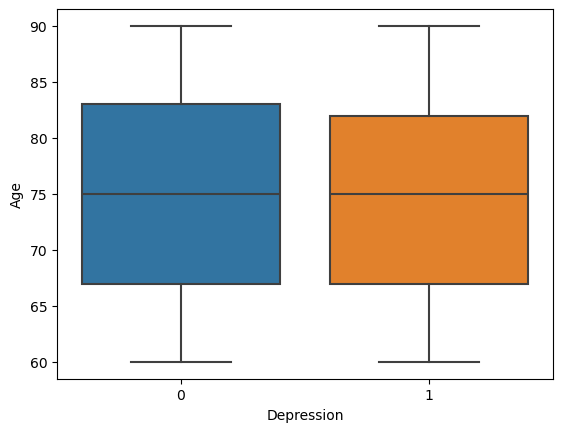

In [15]:
depression = alzheimer_df["Depression"]
#ax = depression.plot.bar()
ax = sns.boxplot(x = 'Depression', y = 'Age', data =alzheimer_df)

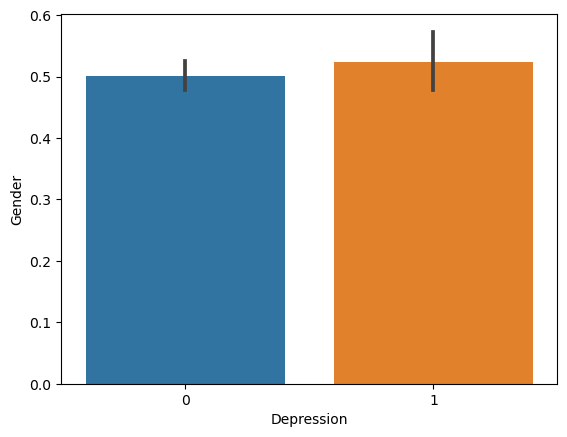

In [16]:
ax = sns.barplot(x = 'Depression', y = 'Gender', data =alzheimer_df)

In [17]:
total_depression= alzheimer_df["Depression"].sum()
total_depression

##number of rows 
print(len(alzheimer_df))



2149


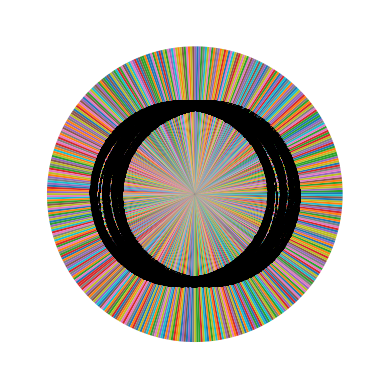

In [18]:
plt.pie(alzheimer_df["Depression"], autopct="%1.1f%%")
plt.show()

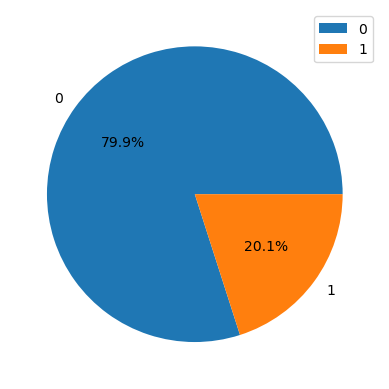

In [19]:
depressed =alzheimer_df["Depression"].value_counts()
plt.pie(depressed, autopct="%1.1f%%", labels = depressed.index)
plt.legend()
plt.show()

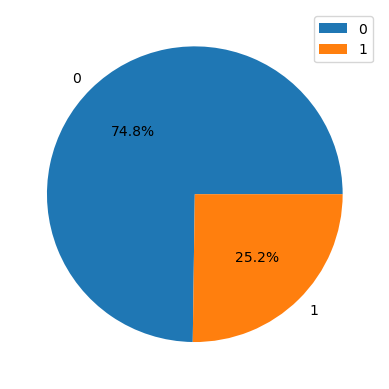

In [20]:
Alzheimer_hist = alzheimer_df["FamilyHistoryAlzheimers"].value_counts()
plt.pie(Alzheimer_hist, autopct="%1.1f%%", labels = Alzheimer_hist.index)
plt.legend()
plt.show()

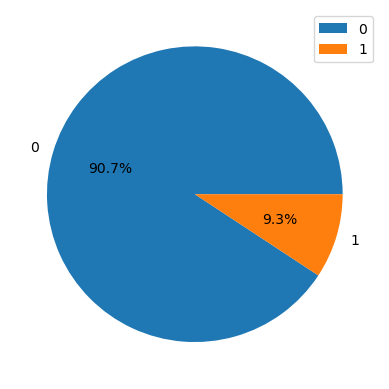

In [21]:
head_damage = alzheimer_df["HeadInjury"].value_counts()
plt.pie(head_damage,autopct="%1.1f%%", labels = head_damage.index )
plt.legend()
plt.show()

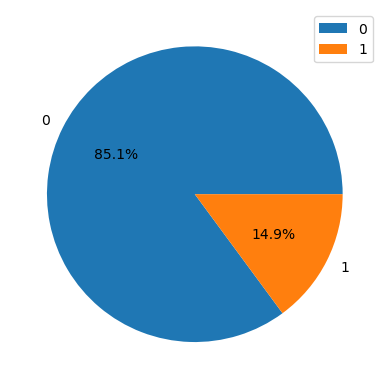

In [22]:
hyperten = alzheimer_df["Hypertension"].value_counts()
plt.pie(hyperten, autopct="%1.1f%%", labels = hyperten.index)
plt.legend()
plt.show()

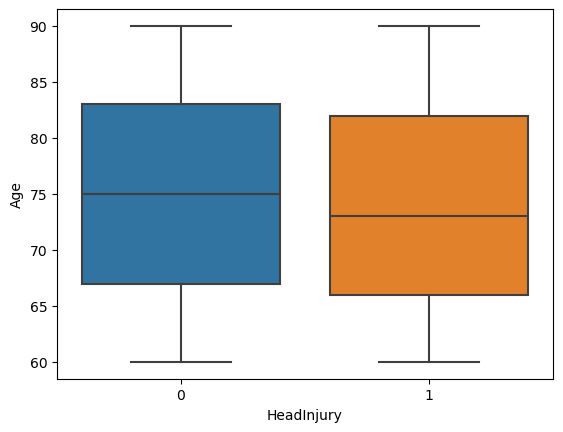

In [23]:
#comparing age and head damage
ax = sns.boxplot(x = 'HeadInjury', y = 'Age', data =alzheimer_df)

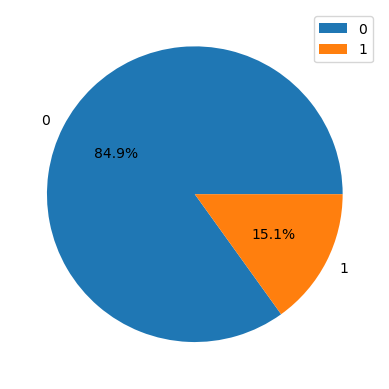

In [24]:
Diabetic = alzheimer_df["Diabetes"].value_counts()
plt.pie(x= Diabetic,autopct="%1.1f%%", labels = Diabetic.index)
plt.legend()
plt.show()


In [25]:
import numpy as np 
import pandas as pd
#summary = alzheimer_df("Diabetes").agg(['mean','median','var','std'])
#summary
alzheimer_df['Diabetes'].describe()


count    2149.000000
mean        0.150768
std         0.357906
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Diabetes, dtype: float64

In [26]:
import scipy.stats as stats
#stats.ttest_ind()
alzheimer_df['Depression'].describe()

count    2149.000000
mean        0.200558
std         0.400511
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Depression, dtype: float64

Logistic Regression

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

alzheimer_df = alzheimer_df.drop(columns = ["PatientID","DoctorInCharge", "DoctorInCharge","Forgetfulness","ADL","PhysicalActivity","BMI","DietQuality"])


In [28]:
from sklearn.model_selection import train_test_split
y = alzheimer_df["Diagnosis"]

X = alzheimer_df.drop(columns="Diagnosis")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, stratify =y)



Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

#scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
#establishing random forest classifier instance
rf = RandomForestClassifier(n_estimators= 500, random_state=278)
rf = rf.fit(X_train_scaled,y_train.ravel())

In [31]:
#making predictions using testing data
predictions = rf.predict(X_test_scaled)

Decision Tree

In [32]:
y_tree = alzheimer_df["Diagnosis"].values.reshape(-1,1)
y_tree[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [33]:
#Features
X_tree= alzheimer_df.copy()
X_tree.drop("Diagnosis", axis=1, inplace=True)
X_tree.head()

,Age,Gender,Ethnicity,EducationLevel,Smoking,AlcoholConsumption,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks
0,73,0,0,2,0,13.297218,9.025679,0,0,1,...,33.682563,162.189143,21.463532,6.518877,0,0,0,0,0,1
1,89,0,0,0,0,4.542524,7.151293,0,0,0,...,79.028477,294.630909,20.613267,7.118696,0,0,0,0,0,0
2,73,0,3,1,0,19.555085,9.673574,1,0,0,...,69.772292,83.638324,7.356249,5.895077,0,0,0,1,0,1
3,74,1,0,1,1,12.209266,8.392554,0,0,0,...,68.457491,277.577358,13.991127,8.965106,0,1,0,0,0,0
4,89,0,0,0,0,18.454356,5.597238,0,0,0,...,56.874305,291.198780,13.517609,6.045039,0,0,0,0,1,1


In [34]:
from sklearn import tree
#splitting training and test data
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, random_state=78)



In [35]:
#scaling data
scaler_tree = StandardScaler()
X_scaler_tree = scaler_tree.fit(X_tree_train)

X_train_scaled_tree= X_scaler_tree.transform(X_tree_train)
X_test_scaled_tree = X_scaler_tree.transform(X_tree_test)


In [36]:
#creating decision tree
model_tree = tree.DecisionTreeClassifier()

In [37]:
#fitting model
model_tree = model_tree.fit(X_train_scaled_tree, y_tree_train)
predic_tree = model_tree.predict(X_test_scaled_tree)

In [38]:
#Confusion matrix
con_matrix = confusion_matrix(y_tree_test, predic_tree)
con_matrix_df = pd.DataFrame(
    con_matrix, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)

#calculate accuracy score
acc_score_tree = accuracy_score(y_tree_test, predic_tree)

In [39]:
print("confusion_matrix")
display(con_matrix_df)
print(f"Accuracy Score: {acc_score_tree}")
print("classification Report")
print(classification_report(y_tree_test, predic_tree))



confusion_matrix


,Predicted 0,Predicted 1
Actual 0,277,70
Actual 1,55,136


Accuracy Score: 0.7676579925650557
classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       347
           1       0.66      0.71      0.69       191

    accuracy                           0.77       538
   macro avg       0.75      0.76      0.75       538
weighted avg       0.77      0.77      0.77       538



In [ ]:
from scipy.stats import ttest_ind_from_stats
Ttest_ind()

[Text(0.7266658026034822, 0.975, 'x[20] <= -0.025\ngini = 0.457\nsamples = 1611\nvalue = [1042, 569]'),
 Text(0.5876121571123522, 0.925, 'x[19] <= 1.042\ngini = 0.494\nsamples = 794\nvalue = [354, 440]'),
 Text(0.5129378490473062, 0.875, 'x[21] <= 0.706\ngini = 0.431\nsamples = 630\nvalue = [198, 432]'),
 Text(0.41877977168199737, 0.825, 'x[22] <= 0.949\ngini = 0.478\nsamples = 492\nvalue = [194, 298]'),
 Text(0.262001067674113, 0.775, 'x[13] <= -0.69\ngini = 0.497\nsamples = 419\nvalue = [192, 227]'),
 Text(0.09132720105124836, 0.725, 'x[16] <= 0.285\ngini = 0.455\nsamples = 126\nvalue = [44, 82]'),
 Text(0.051248357424441525, 0.675, 'x[1] <= -0.001\ngini = 0.492\nsamples = 78\nvalue = [34, 44]'),
 Text(0.02890932982917214, 0.625, 'x[24] <= 0.927\ngini = 0.478\nsamples = 43\nvalue = [26, 17]'),
 Text(0.023653088042049936, 0.575, 'x[13] <= -1.573\ngini = 0.444\nsamples = 39\nvalue = [26, 13]'),
 Text(0.018396846254927726, 0.525, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.02890

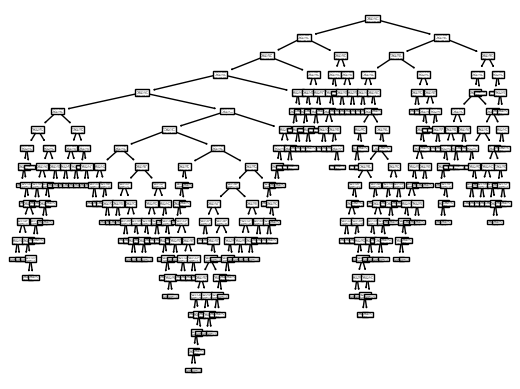

In [41]:

tree.plot_tree(model_tree)